In [56]:
import rasterio
import random
import matplotlib.pyplot as plt
from rasterio.windows import Window

In [42]:
imag = 'D:/check11.tif'

In [43]:
with rasterio.open(imag) as src:
    crs = src.crs
    print(f"CRS of the GeoTIFF: {crs}")

CRS of the GeoTIFF: EPSG:4326


In [44]:
with rasterio.open(imag) as src:
    transform = src.transform
    print(f"Affine Transformation:\n{transform}")

Affine Transformation:
| 0.00, 0.00, 116.34|
| 0.00,-0.00, 40.37|
| 0.00, 0.00, 1.00|


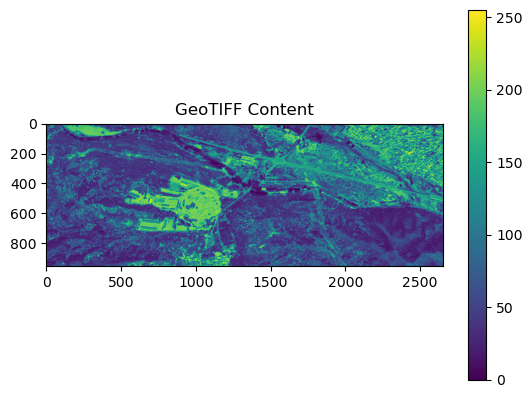

In [45]:
with rasterio.open(imag) as src:
    plt.imshow(src.read(1), cmap='viridis')  # Display the first band of the GeoTIFF
    plt.title('GeoTIFF Content')
    plt.colorbar()
    plt.show()

In [53]:
def display_image_and_center_coordinates(imag, piece_width, piece_height):
    with rasterio.open(imag) as src:
        transform = src.transform
        large_width = src.width
        large_height = src.height

        for x in range(0, large_width, piece_width):
            for y in range(0, large_height, piece_height):
                # Define the coordinates of the current piece
                left = x
                upper = y
                right = x + piece_width
                lower = y + piece_height

                # Read the current piece from the GeoTIFF
                piece = src.read(window=Window(left, upper, piece_width, piece_height))

                # Calculate the center coordinates
                center_x = (left + right) // 2
                center_y = (upper + lower) // 2

                # Convert pixel coordinates to geographic coordinates (latitude and longitude)
                lon, lat = transform * (center_x, center_y)

                # Display the current piece as an RGB image
                if piece.size > 0:
                    plt.imshow(piece.transpose(1, 2, 0))  # Display as RGB
                    plt.axis('off')  # Turn off axis labels
                    plt.show()

                # Display the center coordinates in latitude and longitude
                print("Center coordinates:")
                print(f"Latitude: {lat}, Longitude: {lon}")

In [54]:
piece_width = 500  # Adjust this as needed
piece_height = 500 

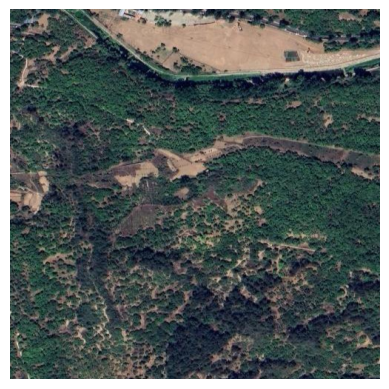

Center coordinates:
Latitude: 40.362423062324524, Longitude: 116.34409368038177


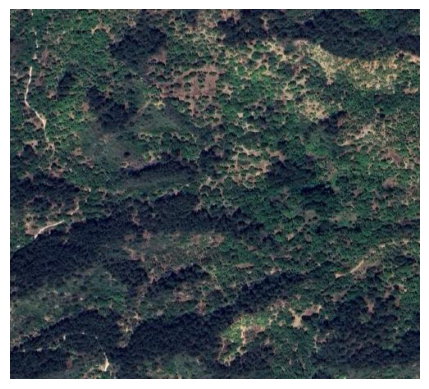

Center coordinates:
Latitude: 40.35705864429474, Longitude: 116.34409368038177


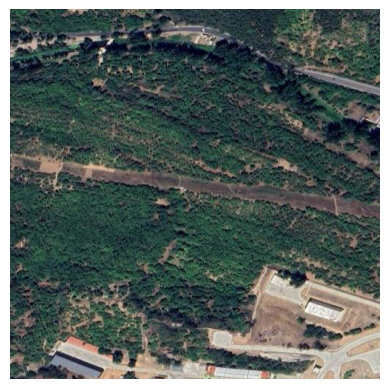

Center coordinates:
Latitude: 40.362423062324524, Longitude: 116.34945809841156


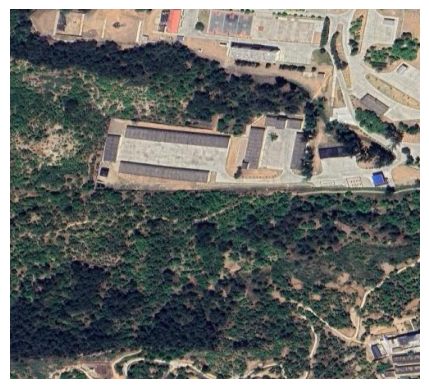

Center coordinates:
Latitude: 40.35705864429474, Longitude: 116.34945809841156


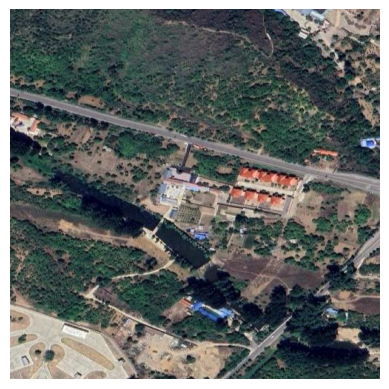

Center coordinates:
Latitude: 40.362423062324524, Longitude: 116.35482251644135


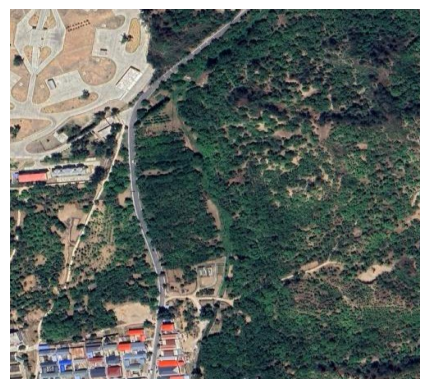

Center coordinates:
Latitude: 40.35705864429474, Longitude: 116.35482251644135


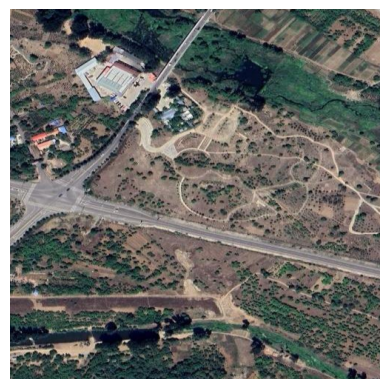

Center coordinates:
Latitude: 40.362423062324524, Longitude: 116.36018693447113


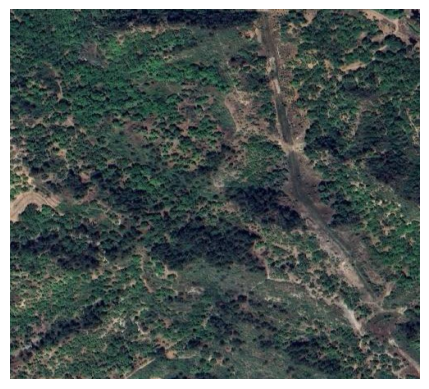

Center coordinates:
Latitude: 40.35705864429474, Longitude: 116.36018693447113


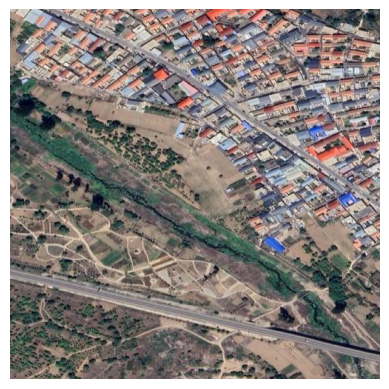

Center coordinates:
Latitude: 40.362423062324524, Longitude: 116.36555135250092


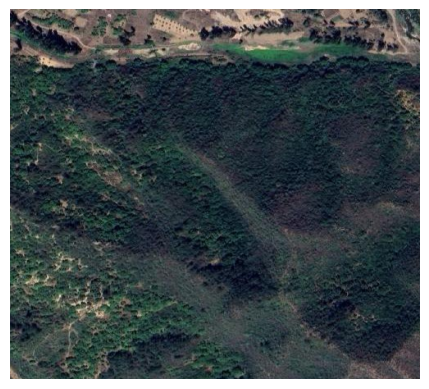

Center coordinates:
Latitude: 40.35705864429474, Longitude: 116.36555135250092


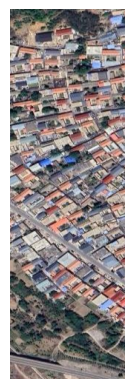

Center coordinates:
Latitude: 40.362423062324524, Longitude: 116.3709157705307


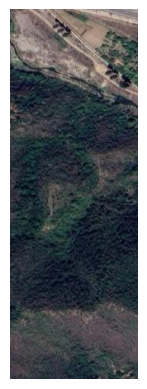

Center coordinates:
Latitude: 40.35705864429474, Longitude: 116.3709157705307


In [58]:
display_image_and_center_coordinates(imag, piece_width, piece_height)